## <p style="text-align: center;">MIS 285N - Big Data and Distributed Programming</p>
## <p style="text-align: center;">Problem Set 4</p>
## <p style="text-align: center;">Total points: 50</p>
## <p style="text-align: center;">Due: Tuesday, 11th October submitted via Canvas by 11:59 pm</p>



# Exercise
Refer to the classification-clothing.ipynb. In this notebook, we worked with FashionMNIST dataset and developed a model. The predictions (on TPU) were made with a confidence score. In this exercise we will play around and mimic the results for MNIST digit handwriting dataset. 

As a final step we will generate a graph of predictions along with their confidence score as shown below. 

Include the code and the graph in your submissions. The reference graph is given below. 

In [ ]:
#%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


In [ ]:
devs =tf.config.experimental.list_physical_devices()
print(devs)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Check if GPU is being used
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5',
               '6', '7', '8', '9']

In [ ]:
train_images = tf.cast(train_images, tf.float32)/ 255.0

test_images = tf.cast(test_images, tf.float32) / 255.0

In [ ]:
with tf.device('/device:GPU:0'):
  gmodel = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
  gmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
%%time
gmodel.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2606 - accuracy: 0.9258
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1152 - accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0801 - accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0601 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0373 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0299 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0237 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

In [ ]:
test_loss, test_acc = gmodel.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9785

Test accuracy: 0.9785000085830688


In [ ]:
predictions = gmodel.predict(test_images)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

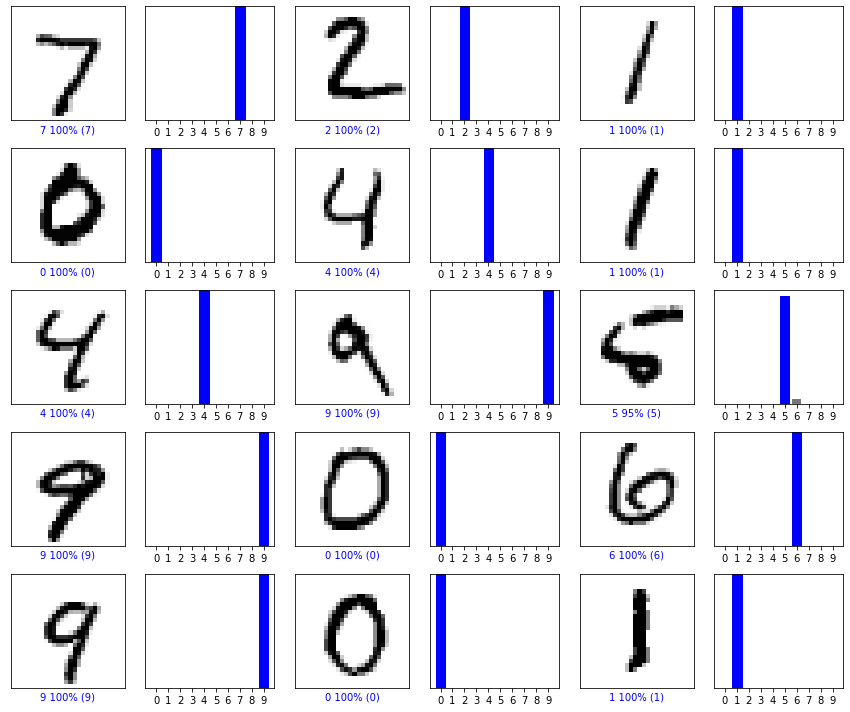

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
#from IPython.display import Image
#Image(filename=r'mnist.png')

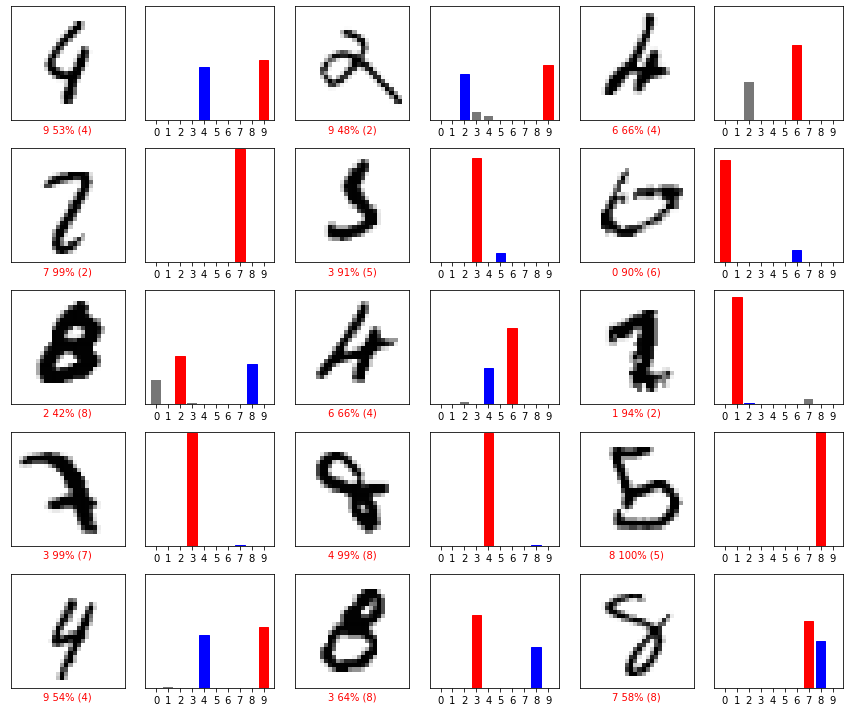

In [ ]:
# Get predictions for 
# Plot the first 15 incorrectly classified test images, their predicted labels, and the true labels.
# These are all incorrect predictions so are colored red.
# Code here
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
count = 0
i = 0
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
while count < num_images:
  if np.argmax(predictions[i]) != test_labels[i]:
    plt.subplot(num_rows, 2*num_cols, 2*count+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*count+2)
    plot_value_array(i, predictions[i], test_labels)
    count += 1
  i += 1
plt.tight_layout()
plt.show()

In [ ]:
# Reference Plot like Classification Clothing notebook
#Image(filename=r'misses2.png')

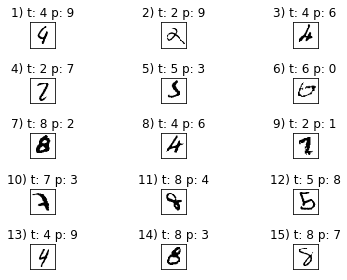

In [ ]:
count = 0
i = 0
miscl_img = [''] * 15
correct_lab = [''] * 15
miscl_lab = [''] * 15
while count < 15:
  if np.argmax(predictions[i]) != test_labels[i]:
    miscl_img[count] = test_images[i]
    correct_lab[count] = test_labels[i]
    miscl_lab[count] = predictions[i]
    count += 1
  i += 1

fig, ax = plt.subplots(nrows=5, ncols=3, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(15):
    img = miscl_img[i]
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], np.argmax(miscl_lab[i])))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
# Reference Plot like Ch12 notebook
#Image(filename=r'misses.png')